## **Proyecto 2:** Implementación y comparación de algoritmos de tokenización subpalabra
### BPE, WordPiece y SentencePiece

In [25]:
# Importamos las clases BytePairEncoding
from BPE import BytePairEncoding
from WP import WordPiece

In [26]:
# Creamos un corpus de ejemplo pequeño

corpus = [
    "el aprendizaje automático es divertido",
    "el procesamiento del lenguaje natural con aprendizaje profundo",
    "el aprendizaje profundo mejora el rendimiento de muchos modelos",
    "las técnicas de incrustación de palabras son útiles en el procesamiento del lenguaje natural",
    "la codificación byte pair y wordpiece son algoritmos de tokenización subpalabra",
    "la tokenización subpalabra es útil para manejar palabras fuera de vocabulario",
    "sentencepiece es otro método popular de tokenización",
    "la traducción automática es una aplicación del procesamiento del lenguaje natural"
]

# Convertir el corpus a un solo texto plano
corpus_text = ' '.join(corpus)

###################################################################


# Creamos un objeto de la clase BytePairEncoding
bpe = BytePairEncoding(num_merges=10)
# Creamos un objeto de la clase WordPiece
wp = WordPiece(corpus=corpus_text,k=10)

###################################################################

# Entrenamos el modelo BPE con el corpus
bpe.train(corpus_text)
# Entrenamos el modelo WordPiece con el corpus
wp.train()

###################################################################

# Comparamos los vocabularios de BPE y WordPiece
print("Vocabulario BPE:")
print(bpe.vocab)
# Tamaño del vocabulario
print("Tamaño del vocabulario BPE:", len(bpe.vocab))

print("\nVocabulario WordPiece:")
print(wp.vocab)
# Tamaño del vocabulario
print("Tamaño del vocabulario WordPiece:", len(wp.vocab))


Vocabulario BPE:
{'c': 'c', 'ú': 'ú', 'p': 'p', 'l': 'l', 'é': 'é', 'r': 'r', 'e': 'e', 'h': 'h', 'd': 'd', 'w': 'w', 'o': 'o', 'v': 'v', 'b': 'b', 'g': 'g', 'm': 'm', 'a': 'a', 'y': 'y', 'ó': 'ó', 'z': 'z', 's': 's', 'f': 'f', 'n': 'n', 'á': 'á', 'i': 'i', 'j': 'j', 'k': 'k', 't': 't', 'u': 'u', 'en': 'en', 'de': 'de', 'ra': 'ra', 'to': 'to', 'la': 'la', 'pr': 'pr', 'es': 'es', 'ci': 'ci', 'ció': 'ció', 'ción': 'ción'}
Tamaño del vocabulario BPE: 38

Vocabulario WordPiece:
['e', '##l', 'a', '##p', '##r', '##e', '##n', '##d', '##i', '##z', '##a', '##j', '##u', '##t', '##o', '##m', '##á', '##c', '##s', 'd', '##v', 'p', 'l', '##g', 'n', 'c', '##f', 'm', 'r', '##h', 't', '##é', 'i', '##ó', '##b', 's', 'ú', 'b', '##y', 'y', 'w', '##k', 'f', 'v', 'o', 'u', '[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]', 'by', '##má', 'té', 'mé', 'ap', '##bp', '##ubp', 'subp', 'fu', '##mát']
Tamaño del vocabulario WordPiece: 61


In [27]:
# Tokenizamos una palabra
word = "procesamiento"

print("\nTokenización de la palabra:", word)
print("BPE:", bpe.tokenize_BPE(word))

print("WordPiece:", wp.tokenize_WordPiece(word))



Tokenización de la palabra: procesamiento
BPE: ['pr', 'o', 'c', 'es', 'a', 'm', 'i', 'en', 'to']
WordPiece: ['p', '##r', '##o', '##c', '##e', '##s', '##a', '##m', '##i', '##e', '##n', '##t', '##o']


In [28]:
# Tokenizamos una oración de ejemplo
sentence = "el aprendizaje es divertido"

print("\nTokenización BPE:")
print(bpe.tokenize_BPE(sentence))
# Cantidad de tokens
print("Cantidad de tokens BPE:", len(bpe.tokenize_BPE(sentence)))

print("\nTokenización WordPiece:")
print(wp.tokenize_WordPiece(sentence))
# Cantidad de tokens
print("Cantidad de tokens WordPiece:", len(wp.tokenize_WordPiece(sentence)))




Tokenización BPE:
['e', 'l', 'a', 'pr', 'en', 'd', 'i', 'z', 'a', 'j', 'e', 'es', 'd', 'i', 'v', 'e', 'r', 't', 'i', 'd', 'o']
Cantidad de tokens BPE: 21

Tokenización WordPiece:
['e', '##l', 'ap', '##r', '##e', '##n', '##d', '##i', '##z', '##a', '##j', '##e', 'e', '##s', 'd', '##i', '##v', '##e', '##r', '##t', '##i', '##d', '##o']
Cantidad de tokens WordPiece: 23


# Pruebas a un corpus mas grande

In [29]:
# Lectura del corpus
path_corpus = './corpus/COSER-0103-01.TXT'

def leer_corpus(archivo):
    try:
        with open(archivo, 'r', encoding='utf-8') as f:
            return f.read()
    except UnicodeDecodeError:
        # Si utf-8 falla, intentamos con latin-1
        with open(archivo, 'r', encoding='latin-1') as f:
            return f.read()

# Leer el archivo
corpus = leer_corpus(path_corpus)
# Imprimimos un extracto del corpus
print("\nExtracto del corpus:")
print(corpus[:2000])
# Imprimimos la longitud del corpus
print("\nLongitud del corpus:", len(corpus))


Extracto del corpus:
Provincia:	Álava
Enclave:	Elburgo/Burgelu (0103)
Fecha:	07 de mayo de 2000
Duración:	01:01:19
Informantes:	I1: varón, 72 años
Encuesta:	José Luis Sánchez, Raúl Aguayo
Transcripción:	Raúl Aguayo Paz, Karolina Labisch, Víctor Lara Bermejo, Alba Aires Salvador
Temas:	1. Matanza del cerdo (chorizo, longaniza, morcilla, jamón, tocino)
2. Alimentación (pan, horno, manteca, huevos, bollos, recetas, pescado)
5. Economía (dinero disponible, salario, nivel de vida, bienes adquiridos)
6. Agricultura (agricultor, campo, cereal, legumbres, huerto, patata, viñas)
7. Ganadería (cabra, oveja, vaca, pastor, leche, queso, lana, abejas, miel)
10. Vida religiosa (cura, iglesia, misa)
11. Vida vecinal (anécdotas, inquietudes, gobierno municipal, guardia civil)
13. Familia (contraste entre generaciones: abuelos, hijos, padres)
14. Bodas y noviazgos (boda, anillos, ajuar)
15. Fiestas populares (romerías, fiestas patronales, carnaval)
18. Ejército/Servicio Militar (mili, quintos, guerra)

In [30]:
from BPE import BytePairEncoding
from WP import WordPiece
import time

# Entrenamos los modelos BPE y WordPiece con el corpus
bpe = BytePairEncoding(num_merges=1000)
# Medimos el tiempo de entrenamiento
start_time = time.time()
bpe.train(corpus)
end_time = time.time()
tiempo_bpe = end_time - start_time
print("\nTiempo de entrenamiento BPE:", tiempo_bpe )
# Tamaño del vocabulario
print("Tamaño del vocabulario BPE:", len(bpe.vocab))


wp = WordPiece(corpus=corpus, k=1000)
# Medimos el tiempo de entrenamiento
start_time = time.time()
wp.train()
end_time = time.time()
tiempo_wp = end_time - start_time
print("\nTiempo de entrenamiento WordPiece:", tiempo_wp)
# Tamaño del vocabulario
print("Tamaño del vocabulario WordPiece:", len(wp.vocab))



Tiempo de entrenamiento BPE: 21.645187377929688
Tamaño del vocabulario BPE: 1044

Tiempo de entrenamiento WordPiece: 4.789201974868774
Tamaño del vocabulario WordPiece: 1084


In [31]:
# Imprimos el vocabulario de BPE
print("\nVocabulario BPE:")
list(bpe.vocab.keys())


Vocabulario BPE:


['6',
 'c',
 '2',
 'p',
 'l',
 '7',
 'ú',
 '8',
 'é',
 'r',
 '0',
 'e',
 'h',
 'd',
 '.',
 ',',
 'o',
 'v',
 'q',
 'b',
 'g',
 '1',
 'm',
 'a',
 'ü',
 'y',
 'ó',
 'z',
 'í',
 'ñ',
 's',
 '4',
 '5',
 '3',
 'x',
 'f',
 'n',
 'á',
 'i',
 '9',
 'j',
 'k',
 't',
 'u',
 'ue',
 'os',
 'en',
 'es',
 'as',
 'er',
 'no',
 'que',
 'de',
 'an',
 'or',
 'al',
 'ar',
 'se',
 'ha',
 'la',
 'co',
 'ta',
 'un',
 'e1',
 'tr',
 'el',
 'in',
 'ía',
 'qu',
 'ba',
 'los',
 'do',
 'pue',
 'ero',
 'hs',
 'ca',
 'i1',
 'di',
 'ch',
 'to',
 'te',
 'go',
 'me',
 'lo',
 'por',
 'da',
 'sí',
 'gu',
 'pues',
 'pero',
 'mos',
 'ya',
 'ti',
 're',
 'si',
 'vi',
 'pa',
 'va',
 'aqu',
 'cu',
 'ent',
 'yo',
 'le',
 'ah',
 'aquí',
 'mu',
 'ma',
 'mi',
 'ci',
 'asent',
 'ás',
 'las',
 'ez',
 'ra',
 'ce',
 'más',
 'mo',
 'tra',
 'ten',
 'eso',
 'po',
 'mb',
 'sea',
 'una',
 'na',
 'est',
 'ri',
 'bue',
 'hay',
 'hab',
 'otr',
 'cas',
 'con',
 'diez',
 'dos',
 'qué',
 've',
 'par',
 'cho',
 'añ',
 'ías',
 'em',
 'cago',
 's

In [32]:
# Imprimos el vocabulario de WordPiece
print("\nVocabulario WordPiece:")
list(wp.vocab)


Vocabulario WordPiece:


['p',
 '##r',
 '##o',
 '##v',
 '##i',
 '##n',
 '##c',
 '##a',
 'á',
 '##l',
 'e',
 '##e',
 '##b',
 '##u',
 '##g',
 'b',
 '0',
 '##1',
 '##0',
 '##3',
 'f',
 '##h',
 '##7',
 'd',
 'm',
 '##y',
 '2',
 '##ó',
 '1',
 '##9',
 'i',
 '##f',
 '##m',
 '##t',
 '##s',
 'v',
 ',',
 '7',
 '##2',
 'a',
 '##ñ',
 'j',
 '##é',
 'l',
 's',
 '##á',
 '##z',
 'r',
 '##ú',
 't',
 '##p',
 'k',
 '##í',
 '##j',
 '##d',
 '.',
 'c',
 'h',
 '5',
 'n',
 '##q',
 '6',
 'g',
 'o',
 'q',
 '##4',
 'y',
 '##5',
 '##8',
 'u',
 '##6',
 '##ü',
 '##k',
 'z',
 'é',
 'í',
 'ú',
 'ó',
 '##x',
 '[PAD]',
 '[UNK]',
 '[CLS]',
 '[SEP]',
 '[MASK]',
 '07',
 '18',
 '19',
 '14',
 '15',
 '13',
 '##03',
 '10',
 '##00',
 '200',
 '2000',
 '72',
 '22',
 '##gü',
 '01',
 '0103',
 '##19',
 '##10',
 '##13',
 '##14',
 '##18',
 'áh',
 'áf',
 't6',
 't19',
 't10',
 't13',
 't7',
 't14',
 't18',
 'íb',
 'fú',
 'i1',
 '11',
 '21',
 '##15',
 't15',
 't5',
 '##gú',
 '##úz',
 '##púz',
 '##púzc',
 '##xp',
 '##xpl',
 'fút',
 'fútb',
 '##fé',
 'ig',
 'jó'

In [33]:
# Tokenizamos una oración de relacionado al tema del corpus - Matanza del cerdo (chorizo, longaniza, morcilla, jamón, tocino)
sentence = "La matanza del cerdo es un misterio en el pueblo pero todos disfrutan de los embutidos"
print("\nTokenización BPE:")
print(bpe.tokenize_BPE(sentence))

print("\nTokenización WordPiece:")
print(wp.tokenize_WordPiece(sentence))


Tokenización BPE:
['la', 'matanza', 'del', 'cerdo', 'es', 'un', 'mis', 'ter', 'i', 'o', 'en', 'el', 'pueblo', 'pero', 'todos', 'dis', 'fr', 'u', 'tan', 'de', 'los', 'e', 'mb', 'u', 'ti', 'dos']

Tokenización WordPiece:
['l', '##a', 'm', '##a', '##t', '##a', '##n', '##z', '##a', 'd', '##e', '##l', 'c', '##e', '##r', '##d', '##o', 'es', 'un', 'm', '##i', '##s', '##t', '##e', '##r', '##i', '##o', 'en', 'el', 'pueblo', 'p', '##e', '##r', '##o', 't', '##o', '##d', '##o', '##s', 'disfrut', '##a', '##n', 'd', '##e', 'l', '##o', '##s', 'emb', '##ut', '##i', '##d', '##o', '##s']


## Graficamos varios resultados


Entrenando WordPiece para el archivo: ./corpus/COSER-0102-01.TXT
Tamaño del vocabulario WordPiece después del entrenamiento: 1082

Entrenando WordPiece para el archivo: ./corpus/COSER-0103-01.TXT
Tamaño del vocabulario WordPiece después del entrenamiento: 1084

Entrenando WordPiece para el archivo: ./corpus/COSER-0106-01.TXT
Tamaño del vocabulario WordPiece después del entrenamiento: 1085

Entrenando WordPiece para el archivo: ./corpus/COSER-0107-01.TXT
Tamaño del vocabulario WordPiece después del entrenamiento: 1087

Entrenando WordPiece para el archivo: ./corpus/COSER-0109-02.TXT
Tamaño del vocabulario WordPiece después del entrenamiento: 1081


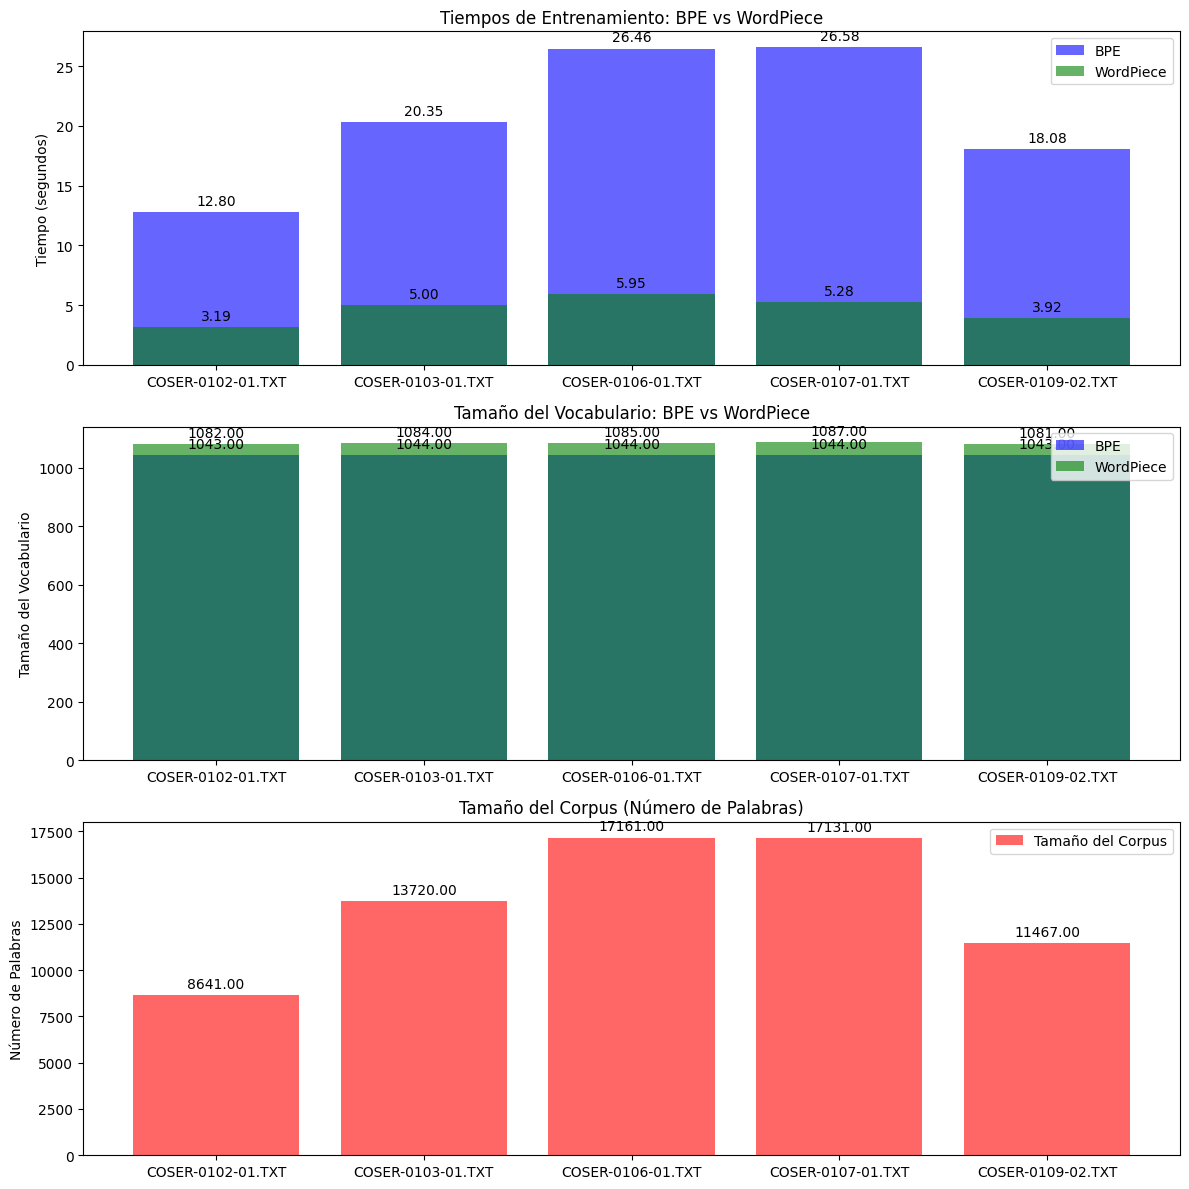

In [35]:
import time
import matplotlib.pyplot as plt

# Función para leer el corpus desde un archivo
def leer_corpus(archivo):
    try:
        with open(archivo, 'r', encoding='utf-8') as f:
            return f.read()
    except UnicodeDecodeError:
        with open(archivo, 'r', encoding='latin-1') as f:
            return f.read()

# Función para medir el tiempo de entrenamiento y tamaño del vocabulario de BPE y WordPiece
def medir_tiempos_y_vocab(corpus_paths, bpe_model):
    tiempos_bpe = []
    tiempos_wp = []
    vocab_size_bpe = []
    vocab_size_wp = []
    tamano_corpus = []
    nombres_corpus = []

    for archivo in corpus_paths:
        # Leer el corpus
        corpus = leer_corpus(archivo)
        nombres_corpus.append(archivo.split("/")[-1])  # Guardar el nombre del archivo

        # Guardar tamaño del corpus (número de palabras)
        tamano_corpus.append(len(corpus.split()))

        # Medir tiempo de entrenamiento BPE
        start_time = time.time()
        bpe_model.train(corpus)
        end_time = time.time()
        tiempos_bpe.append(end_time - start_time)

        # Tamaño del vocabulario BPE
        vocab_size_bpe.append(len(bpe_model.vocab))

        # Inicializar y entrenar el modelo WordPiece con el corpus actual
        wp_model = WordPiece(corpus=corpus, k=1000)
        print(f"\nEntrenando WordPiece para el archivo: {archivo}")
        start_time = time.time()
        wp_model.train()
        end_time = time.time()
        tiempos_wp.append(end_time - start_time)

        # Tamaño del vocabulario WordPiece
        vocab_size_wp.append(len(wp_model.vocab))
        print(f"Tamaño del vocabulario WordPiece después del entrenamiento: {len(wp_model.vocab)}")

    return tiempos_bpe, tiempos_wp, vocab_size_bpe, vocab_size_wp, tamano_corpus, nombres_corpus

# Función para agregar etiquetas a las barras
def agregar_etiquetas_barras(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',  # Etiqueta con el valor
                    xy=(rect.get_x() + rect.get_width() / 2, height),  # Posición de la etiqueta
                    xytext=(0, 3),  # Margen de la etiqueta respecto a la barra
                    textcoords="offset points",
                    ha='center', va='bottom')

# Función para graficar los resultados
def graficar_resultados(nombres_corpus, tiempos_bpe, tiempos_wp, vocab_size_bpe, vocab_size_wp, tamano_corpus):
    fig, ax = plt.subplots(3, 1, figsize=(12, 12))

    # Gráfico de tiempos de entrenamiento
    rects_bpe = ax[0].bar(nombres_corpus, tiempos_bpe, label='BPE', alpha=0.6, color='b')
    rects_wp = ax[0].bar(nombres_corpus, tiempos_wp, label='WordPiece', alpha=0.6, color='g')
    ax[0].set_title('Tiempos de Entrenamiento: BPE vs WordPiece')
    ax[0].set_ylabel('Tiempo (segundos)')
    ax[0].legend()
    
    # Etiquetas en las barras
    agregar_etiquetas_barras(ax[0], rects_bpe)
    agregar_etiquetas_barras(ax[0], rects_wp)

    # Gráfico de tamaño de vocabulario
    rects_bpe_vocab = ax[1].bar(nombres_corpus, vocab_size_bpe, label='BPE', alpha=0.6, color='b')
    rects_wp_vocab = ax[1].bar(nombres_corpus, vocab_size_wp, label='WordPiece', alpha=0.6, color='g')
    ax[1].set_title('Tamaño del Vocabulario: BPE vs WordPiece')
    ax[1].set_ylabel('Tamaño del Vocabulario')
    ax[1].legend()

    # Etiquetas en las barras
    agregar_etiquetas_barras(ax[1], rects_bpe_vocab)
    agregar_etiquetas_barras(ax[1], rects_wp_vocab)

    # Gráfico de tamaño del corpus (número de palabras)
    rects_corpus = ax[2].bar(nombres_corpus, tamano_corpus, label='Tamaño del Corpus', alpha=0.6, color='r')
    ax[2].set_title('Tamaño del Corpus (Número de Palabras)')
    ax[2].set_ylabel('Número de Palabras')
    ax[2].legend()

    # Etiquetas en las barras
    agregar_etiquetas_barras(ax[2], rects_corpus)

    plt.tight_layout()
    plt.show()

# Lista de archivos de corpus
corpus_paths = [
    './corpus/COSER-0102-01.TXT',
    './corpus/COSER-0103-01.TXT',
    './corpus/COSER-0106-01.TXT',
    './corpus/COSER-0107-01.TXT',
    './corpus/COSER-0109-02.TXT',
    # Agrega más archivos de tu carpeta corpus aquí
]

# Inicializamos el modelo de BPE
bpe_model = BytePairEncoding(num_merges=1000, verbose=False)

# Medimos los tiempos y el tamaño del vocabulario
tiempos_bpe, tiempos_wp, vocab_size_bpe, vocab_size_wp, tamano_corpus, nombres_corpus = medir_tiempos_y_vocab(corpus_paths, bpe_model)

# Graficamos los resultados
graficar_resultados(nombres_corpus, tiempos_bpe, tiempos_wp, vocab_size_bpe, vocab_size_wp, tamano_corpus)
